In [2]:
# 1: przygotowanie ustawień
import math
import numpy as np


### SETTINGS ###
np.random.seed(1968003) # Fixing random state for reproducibility
cities = 10 # how many cities
length = 100 # area where we have cities (map size)
roundCnt = 2 # round 

A = np.random.randint(length, size=(cities, 2)) #generate cities
print(A)

B = np.zeros((cities, cities)) #generate array for storage length of routes
# print(B)

[[96 77]
 [ 8 98]
 [72 69]
 [39 71]
 [23 48]
 [33  9]
 [34 88]
 [98 63]
 [ 8 39]
 [29 59]]


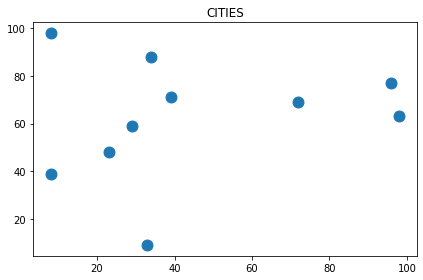

In [3]:
# 2: CHART
import matplotlib.pyplot as plt

plt.figure()
# Scatter plot on top of lines
plt.subplot(111)
plt.scatter(A[:,0], A[:,1], s=120, zorder=2)
plt.title('CITIES')
plt.tight_layout()
plt.savefig("test.png")

In [4]:
# 3: obliczanie odleglosci miedzy punktami:
# d^2 = (x2-x1)^2+(y2-y1)^2

for i in range(cities):
    for j in range(cities):
        B[i,j] = round(math.sqrt(math.pow((A[j,0]-A[i,0]),2)+math.pow((A[j,1]-A[i,1]),2)),roundCnt)

# show array with routes
print(B)

# show all routes
if False:
    for i in range(cities):
        for j in range(cities):
            print(i,"=[", A[i,0],A[i,1],"]", j,"=[", A[j,0],A[j,1],"]", end="\t")
            print("len: A", i, "- A", j, "  = ", B[i,j])

              

[[ 0.   90.47 25.3  57.31 78.55 92.7  62.97 14.14 95.85 69.38]
 [90.47  0.   70.26 41.11 52.2  92.44 27.86 96.57 59.   44.29]
 [25.3  70.26  0.   33.06 53.31 71.56 42.49 26.68 70.68 44.15]
 [57.31 41.11 33.06  0.   28.02 62.29 17.72 59.54 44.55 15.62]
 [78.55 52.2  53.31 28.02  0.   40.26 41.48 76.49 17.49 12.53]
 [92.7  92.44 71.56 62.29 40.26  0.   79.01 84.5  39.05 50.16]
 [62.97 27.86 42.49 17.72 41.48 79.01  0.   68.71 55.47 29.43]
 [14.14 96.57 26.68 59.54 76.49 84.5  68.71  0.   93.15 69.12]
 [95.85 59.   70.68 44.55 17.49 39.05 55.47 93.15  0.   29.  ]
 [69.38 44.29 44.15 15.62 12.53 50.16 29.43 69.12 29.    0.  ]]


In [5]:
#4 rozwiązanie problemu komiwojażera za pomocą metody najbliższego sąsiada
print("#1 Metoda najbliższego sąsiada:")
allPaths = list()
for firstCity in range(cities):
    visited = list()
    visited.append(firstCity)

    wholePath = 0
    #search shortest way
    while len(visited) < cities:
        nearCityPath = 9999
        nearCityName = 9999
        for neighbour in range(cities):
            if neighbour not in visited :
                if B[firstCity,neighbour] < nearCityPath :
                    nearCityPath = B[firstCity,neighbour]
                    nearCityName = neighbour
        if nearCityName != 9999:
            wholePath = wholePath+nearCityPath
            visited.append(nearCityName)
    print("visited:",visited,"wholePath:",wholePath)
    allPaths.append(wholePath)
print("all paths: ",allPaths)
print("min(allPaths): ", min(allPaths))
print("max(allPaths): ", max(allPaths))
print("avg(allPaths): ", sum(allPaths) / len(allPaths) )
print("shortest way is ",min(allPaths)/max(allPaths),"% longest way")
  
            
    

#1 Metoda najbliższego sąsiada:
visited: [0, 7, 2, 3, 6, 9, 4, 1, 5, 8] wholePath: 586.67
visited: [1, 6, 3, 9, 4, 8, 2, 0, 5, 7] wholePath: 574.1999999999999
visited: [2, 0, 7, 3, 6, 9, 4, 1, 8, 5] wholePath: 437.49
visited: [3, 9, 6, 4, 2, 1, 8, 0, 7, 5] wholePath: 359.22
visited: [4, 9, 8, 3, 5, 6, 1, 2, 7, 0] wholePath: 400.33
visited: [5, 8, 4, 9, 3, 2, 6, 7, 1, 0] wholePath: 611.97
visited: [6, 3, 1, 9, 4, 2, 8, 0, 7, 5] wholePath: 425.13999999999993
visited: [7, 0, 2, 3, 6, 9, 4, 5, 8, 1] wholePath: 588.9000000000001
visited: [8, 4, 9, 5, 3, 6, 1, 2, 7, 0] wholePath: 504.24
visited: [9, 4, 3, 8, 6, 2, 1, 5, 7, 0] wholePath: 363.67999999999995
all paths:  [586.67, 574.1999999999999, 437.49, 359.22, 400.33, 611.97, 425.13999999999993, 588.9000000000001, 504.24, 363.67999999999995]
min(allPaths):  359.22
max(allPaths):  611.97
avg(allPaths):  485.184
shortest way is  0.586989558311682 % longest way


min(allPaths):  359.22 index:  3
visited: [9, 3, 6, 4, 2, 1, 8, 0, 7, 5] wholePath: 359.22
visited: [8, 5, 4, 9, 3, 2, 6, 7, 1, 0] wholePath: 611.97


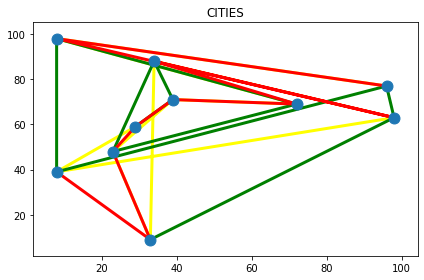

In [6]:
print("min(allPaths): ", min(allPaths), "index: ", allPaths.index(min(allPaths))) 

### exp
# SHORTEST:
firstCity = allPaths.index(min(allPaths))
if True:
    vis = cities * [-1]
    #vis = vis -1
    vis[0] = firstCity
    visited = list()
    visited.append(firstCity)

    wholePath = 0
    #search shortest way
    #while len(visited) < cities:
    for latest in range(cities):
        nearCityPath = 9999
        nearCityName = 9999
        for neighbour in range(cities):
            if neighbour not in vis :
            #if neighbour not in visited :
                if B[firstCity,neighbour] < nearCityPath :
                    nearCityPath = B[firstCity,neighbour]
                    nearCityName = neighbour
        if nearCityName != 9999:
            wholePath = wholePath+nearCityPath
            #visited.append(nearCityName)
            vis[latest] = nearCityName
            visited.append(nearCityName)
    print("visited:",vis,"wholePath:",wholePath)
    # print("visited:",visited,"wholePath:",wholePath)
    allPaths.append(wholePath)

A1 = np.zeros((cities, 2))
for i in range(cities):
    A1[i,0]=A[vis[i],0]
    A1[i,1]=A[vis[i],1]
   # LONGEST:
firstCity = allPaths.index(max(allPaths))
if True:
    vis = cities * [-1]
    #vis = vis -1
    vis[0] = firstCity
    visited = list()
    visited.append(firstCity)

    wholePath = 0
    #search shortest way
    #while len(visited) < cities:
    for latest in range(cities):
        nearCityPath = 9999
        nearCityName = 9999
        for neighbour in range(cities):
            if neighbour not in vis :
            #if neighbour not in visited :
                if B[firstCity,neighbour] < nearCityPath :
                    nearCityPath = B[firstCity,neighbour]
                    nearCityName = neighbour
        if nearCityName != 9999:
            wholePath = wholePath+nearCityPath
            #visited.append(nearCityName)
            vis[latest] = nearCityName
            visited.append(nearCityName)
    print("visited:",vis,"wholePath:",wholePath)
    # print("visited:",visited,"wholePath:",wholePath)
    allPaths.append(wholePath)

A2 = np.zeros((cities, 2))
for i in range(cities):
    A2[i,0]=A[vis[i],0]
    A2[i,1]=A[vis[i],1]
    
###exp
# write paths
plt.figure()
# Scatter plot on top of lines
plt.subplot(111)
plt.plot(A[:,0], A[:,1], 'C3', zorder=1, lw=3, color = 'yellow')
plt.plot(A1[:,0], A1[:,1], 'C3', zorder=1, lw=3, color='green')
plt.plot(A2[:,0], A2[:,1], 'C3', zorder=1, lw=3, color='red')
plt.scatter(A[:,0], A[:,1], s=120, zorder=2)
plt.title('CITIES')
plt.tight_layout()
